<a href="https://colab.research.google.com/github/VijayLaxmi999/PBEL/blob/main/Lin_Reg_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
input,label=make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1,random_state=13)

In [ ]:
input.shape    # to check rxc

(100, 2)

In [ ]:
label.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,label,test_size=0.2,random_state=13)

In [ ]:
x_train.shape

(80, 2)

In [ ]:
x_test.shape

(20, 2)

<Axes: >

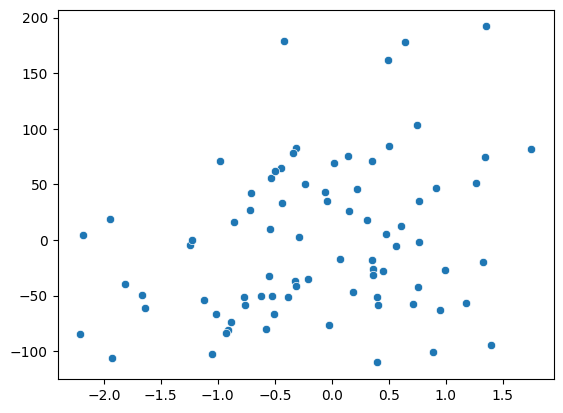

In [ ]:
sns.scatterplot(x=x_train[:,0],y=y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
LR.score(x_train,y_train)

1.0

In [ ]:
y_test

array([ 100.60839535,   38.00515899,  -23.82260092,  -80.13142959,
         39.22123933,  -15.43068646,  173.2228183 ,   68.38156353,
       -118.80036512,  -10.35446368,  -23.75571899,   26.67245688,
       -181.62816992,   15.33096001,   83.88826765,  -47.95383985,
        -74.21036424,  -61.16869946, -101.51943049,  -47.1729924 ])

In [ ]:
y_pred=LR.predict(x_test)
y_pred

array([ 100.60839535,   38.00515899,  -23.82260092,  -80.13142959,
         39.22123933,  -15.43068646,  173.2228183 ,   68.38156353,
       -118.80036512,  -10.35446368,  -23.75571899,   26.67245688,
       -181.62816992,   15.33096001,   83.88826765,  -47.95383985,
        -74.21036424,  -61.16869946, -101.51943049,  -47.1729924 ])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

1.4299672557172018e-14
4.485463107086673e-28


In [2]:
# creating ML algo
class Mera_linreg:
  def __init__(self):
    self.beta=None #placeholder for coefficent

  def fit(self,x_train,y_train):
    assert x_train.shape[0]>0

    x_train=np.insert(x_train,0,1,axis=1)
    self.beta=np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

  def predict(self,x_test):
    if self.beta is None:
      raise Exception("Model is not trained yet")
    x_test=np.insert(x_test,0,1,axis=1)
    return x_test @ self.beta